<a href="https://colab.research.google.com/github/Emilyjane994/Development-of-Novel-MLfor-predicting-TCR-peptide-MHC-binding-/blob/main/updated_VHSE8_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Title:  MLP model using VHSE8 encoding method for amino acids
##Author: E. McLeish
##last updated: 29/11/2023

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras as keras
from keras.layers import InputSpec
from keras.layers import Embedding, Flatten, Dense, Concatenate
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import pad_sequences
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

%cd /content/gdrive/MyDrive/iPREP Biodesign project

# Load the dataset
data = pd.read_csv('combined_data3.csv', encoding='latin', low_memory=False)
data

/content/gdrive/MyDrive/iPREP Biodesign project


,HLA.aa,Antigen,Affinity,TCR_full,HLA.aa_encoded,Antigen_encoded,TCR_full_encoded
0,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,YVLDHLIVV,1,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...,"[0.74, 0.7, 0.16, 0.07, 0.19, 0.05, 0.35, 0.14...","[0.7, 0.61, 0.53, 0.26, 0.25, 0.18, 0.33, 0.2,...","[0.61, 0.5, -0.31, 0.15, 0.14, -0.25, 0.36, 0...."
1,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,GLCTLVAML,1,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...,"[0.74, 0.7, 0.16, 0.07, 0.19, 0.05, 0.35, 0.14...","[0.74, 0.7, 0.16, 0.07, 0.19, 0.05, 0.35, 0.14...","[0.61, 0.5, -0.31, 0.15, 0.14, -0.25, 0.36, 0...."
2,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,TFEYVSQPFLMDLE,0,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...,"[0.74, 0.7, 0.16, 0.07, 0.19, 0.05, 0.35, 0.14...","[0.66, 0.5, -0.21, 0.13, 0.18, -0.2, 0.35, 0.1...","[0.61, 0.5, -0.31, 0.15, 0.14, -0.25, 0.36, 0...."
3,SPEDFVFQFKGMCYFTNGTERVRLVTRYIYNREEYARFDSDVGVYR...,LLWNGPMAV,0,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...,"[0.61, 0.5, -0.31, 0.15, 0.14, -0.25, 0.36, 0....","[0.92, 0.61, 0.71, 0.29, 0.32, 0.27, 0.34, 0.2...","[0.61, 0.5, -0.31, 0.15, 0.14, -0.25, 0.36, 0...."
4,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,YVLDHLIVV,1,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...,"[0.74, 0.7, 0.16, 0.07, 0.19, 0.05, 0.35, 0.14...","[0.7, 0.61, 0.53, 0.26, 0.25, 0.18, 0.33, 0.2,...","[0.61, 0.5, -0.31, 0.15, 0.14, -0.25, 0.36, 0...."
...,...,...,...,...,...,...,...
18492,PENYLFQGRQECYAFNGTQRFLERYIYNREEFARFDSDVGEFRAVT...,SLFFSAQPFEITAST,0,VTQMEGPVTLSEEAFLTINCTYTATGYPSLFWYVQYPGEGLQLLLK...,"[0.64, 0.5, -0.16, 0.12, 0.18, -0.23, 0.34, 0....","[0.61, 0.5, -0.31, 0.15, 0.14, -0.25, 0.36, 0....","[0.86, 0.61, 0.44, 0.28, 0.27, 0.25, 0.36, 0.2..."
18493,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,ALALLLLDR,1,VTQMEGPVTLSEEAFLTINCTYTATGYPSLFWYVQYPGEGLQLLLK...,"[0.74, 0.7, 0.16, 0.07, 0.19, 0.05, 0.35, 0.14...","[0.62, 1.0, -0.5, 0.09, 0.26, -0.19, 0.56, 0.2...","[0.86, 0.61, 0.44, 0.28, 0.27, 0.25, 0.36, 0.2..."
18494,SPEDFVFQFKGMCYFTNGTERVRLVTRYIYNREEYARFDSDVGVYR...,NLVPMVATV,0,VTQMEGPVTLSEEAFLTINCTYTATGYPSLFWYVQYPGEGLQLLLK...,"[0.61, 0.5, -0.31, 0.15, 0.14, -0.25, 0.36, 0....","[0.63, 0.5, -0.42, 0.21, 0.16, -0.28, 0.43, 0....","[0.86, 0.61, 0.44, 0.28, 0.27, 0.25, 0.36, 0.2..."
18495,GSHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREE...,RPHERNGFTVL,0,VTQMEGPVTLSEEAFLTINCTYTATGYPSLFWYVQYPGEGLQLLLK...,"[0.74, 0.7, 0.16, 0.07, 0.19, 0.05, 0.35, 0.14...","[0.85, 0.5, -0.95, 0.26, 0.31, -0.47, 0.18, 0....","[0.86, 0.61, 0.44, 0.28, 0.27, 0.25, 0.36, 0.2..."


In [ ]:
data= data.drop(columns=[data.columns[4], data.columns[5], data.columns[6]])

In [ ]:
data

,HLA.aa,Antigen,Affinity,TCR_full
0,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,YVLDHLIVV,1,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...
1,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,GLCTLVAML,1,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...
2,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,TFEYVSQPFLMDLE,0,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...
3,SPEDFVFQFKGMCYFTNGTERVRLVTRYIYNREEYARFDSDVGVYR...,LLWNGPMAV,0,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...
4,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,YVLDHLIVV,1,SLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFLSY...
...,...,...,...,...
18492,PENYLFQGRQECYAFNGTQRFLERYIYNREEFARFDSDVGEFRAVT...,SLFFSAQPFEITAST,0,VTQMEGPVTLSEEAFLTINCTYTATGYPSLFWYVQYPGEGLQLLLK...
18493,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,ALALLLLDR,1,VTQMEGPVTLSEEAFLTINCTYTATGYPSLFWYVQYPGEGLQLLLK...
18494,SPEDFVFQFKGMCYFTNGTERVRLVTRYIYNREEYARFDSDVGVYR...,NLVPMVATV,0,VTQMEGPVTLSEEAFLTINCTYTATGYPSLFWYVQYPGEGLQLLLK...
18495,GSHSMRYFYTSVSRPGRGEPRFISVGYVDDTQFVRFDSDAASPREE...,RPHERNGFTVL,0,VTQMEGPVTLSEEAFLTINCTYTATGYPSLFWYVQYPGEGLQLLLK...


In [ ]:
# Amino acid properties data
vhse8_encoding= {
    'A': (0.15, -1.11, -1.35, -0.92, 0.02, -0.91, 0.36, -0.48),
    'R': (-1.47, 1.45, 1.24, 1.27, 1.55, 1.47, 1.30, 0.83),
    'N': (-0.99, 0.00, -0.37, 0.69, -0.55, 0.85, 0.73, -0.80),
    'D': (-1.15, 0.67, -0.41, -0.01, -2.68, 1.31, 0.03, 0.56),
    'C': (0.18, -1.67, -0.46, -0.21, 0.00, 1.20, -1.61, -0.19),
    'Q':(-0.96, 0.12, 0.18, 0.16, 0.09, 0.42, -0.20, -0.41),
    'E': (-1.18, 0.40, 0.10, 0.36, -2.16, -0.17, 0.91, 0.02),
    'G': (-0.20, -1.53, -2.63, 2.28, -0.53, -1.18, 2.01, -1.34),
    'H': (-0.43, -0.25, 0.37, 0.19, 0.51, 1.28, 0.93, 0.65),
    'I': (1.27, -0.14, 0.30, -1.80, 0.30, -1.61, -0.16, -0.13),
    'L': (1.36, 0.07, 0.26, -0.80, 0.22, -1.37, 0.08, -0.62),
    'K': (-1.17, 0.70, 0.70, 0.80, 1.64, 0.67, 1.63, 0.13),
    'M': (1.01, -0.53, 0.43, 0.00, 0.23, 0.10, -0.86, -0.68),
    'F': (1.52, 0.61, 0.96, -0.16, 0.25, 0.28, -1.33, -0.20),
    'P': (0.22, -0.17, -0.50, 0.05, -0.01, -1.34, -0.19, 3.56),
    'S': (-0.67, -0.86, -1.07, -0.41, -0.32, 0.27, -0.64, 0.11),
    'T': (-0.34, -0.51, -0.55, -1.06, -0.06, -0.01, -0.79, 0.39),
    'W': (1.50, 2.06, 1.79, 0.75, 0.75, -0.13, -1.01, -0.85),
    'Y': (0.61, 1.60, 1.17, 0.73, 0.53, 0.25, -0.96, -0.52),
    'V': (0.76, -0.92, -0.17, -1.91, 0.22, -1.40, -0.24, -0.03),
}


In [ ]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, data, max_sequence_length, vhse8_encoding):
        self.data = data
        self.max_sequence_length = max_sequence_length
        self.vhse8_encoding = vhse8_encoding

    def encode_sequence_vhse8(self, sequence, vhse8_encoding):
        encoded_sequence = [vhse8_encoding[aa] for aa in sequence]
        return torch.tensor(encoded_sequence, dtype=torch.float32)

    def pad_sequence_to_max_length(self, sequence, max_length, padding_value=0):
        if len(sequence) >= max_length:
            return sequence
        else:
            padding_length = max_length - len(sequence)
        if padding_length > 0:
            padding_tensor = torch.tensor([padding_value] * (padding_length * sequence.shape[1]), dtype=torch.float32, device=sequence.device).view(padding_length, sequence.shape[1])
            padded_sequence = torch.cat([sequence, padding_tensor], dim=0)
        else:
            padded_sequence = sequence
        return padded_sequence

    def __getitem__(self, index):
        TCR = self.data.iloc[index]['TCR_full']
        hla_aa = self.data.iloc[index]['HLA.aa']
        antigen = self.data.iloc[index]['Antigen']

        TCR_encoded = self.encode_sequence_vhse8(TCR, self.vhse8_encoding)
        hla_aa_encoded = self.encode_sequence_vhse8(hla_aa, self.vhse8_encoding)
        antigen_encoded = self.encode_sequence_vhse8(antigen, self.vhse8_encoding)

        TCR_padded = self.pad_sequence_to_max_length(TCR_encoded, max_length=self.max_sequence_length, padding_value=0)
        hla_aa_padded = self.pad_sequence_to_max_length(hla_aa_encoded, max_length=self.max_sequence_length, padding_value=0)
        antigen_padded = self.pad_sequence_to_max_length(antigen_encoded, max_length=self.max_sequence_length, padding_value=0)

        sample = {
            'TCR_encoded': TCR_padded,
            'HLA.aa_encoded': hla_aa_padded,
            'Antigen_encoded': antigen_padded,
            'Affinity': self.data.iloc[index]['Affinity']
        }
        return sample

    def __len__(self):
        return len(self.data)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset


# Split the data into training and temporary (combined validation and testing) sets
train_data, temp_data = train_test_split(data, test_size=0.2, stratify=data['Affinity'], random_state=42)

# Further split the temporary data into validation and testing sets
validation_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['Affinity'], random_state=42)

# Calculate the maximum sequence length in your combined_data
max_sequence_length = max(
    max(len(seq) for seq in train_data['TCR_full']),
    max(len(seq) for seq in train_data['HLA.aa']),
    max(len(seq) for seq in train_data['Antigen'])
)


# Create instances of the custom dataset with VHSE8 encoding and max_sequence_length
train_dataset = CustomDataset(train_data, max_sequence_length, vhse8_encoding)
test_dataset = CustomDataset(test_data, max_sequence_length, vhse8_encoding)
validation_dataset = CustomDataset(validation_data, max_sequence_length, vhse8_encoding)

# Define batch size and create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size)

# Define your target labels for training
y_train = train_data['Affinity'].values

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Reshape the input tensor
        x = x.view(x.size(0), -1)

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x


# Define hyperparameters
input_size = max_sequence_length*3*8
hidden_size =128
output_size = 1
learning_rate = 0.001
num_epochs = 10
batch_size=64

# Create the MLP model, loss function, and optimizer
model = MLP(input_size=max_sequence_length * 3 * 8, hidden_size=hidden_size, output_size=output_size)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import KFold
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.metrics import accuracy_score

# Set the random seed for reproducibility
random.seed(42)
torch.manual_seed(42)

train_losses = []  # To store training losses for each fold
validation_losses = []  # To store validation losses for each fold
validation_accuracies=[]

# Define your train_and_validate function
def train_and_validate(train_dataset, validation_dataset, model, criterion, optimizer, num_epochs, writer, fold):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    validation_loader = DataLoader(validation_dataset, batch_size=batch_size)

    train_losses.append([])  # Create an empty list for this fold
    validation_losses.append([])  # Create an empty list for this fold
    validation_accuracies.append([])  # Create an empty list for this fold

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for batch in train_loader:
            tcr_inputs = batch['TCR_encoded'].float().unsqueeze(1)
            hla_inputs = batch['HLA.aa_encoded'].float().unsqueeze(1)
            antigen_inputs = batch['Antigen_encoded'].float().unsqueeze(1)

            inputs = torch.cat((tcr_inputs, hla_inputs, antigen_inputs), dim=1)

            labels = batch['Affinity'].float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()



# Validation loop
        model.eval()
        val_loss = 0.0
        all_labels = []  # Initialize these lists here
        all_outputs = []

        with torch.no_grad():
            for batch in validation_loader:
                tcr_inputs = batch['TCR_encoded'].float().unsqueeze(1)
                hla_inputs = batch['HLA.aa_encoded'].float().unsqueeze(1)
                antigen_inputs = batch['Antigen_encoded'].float().unsqueeze(1)

                inputs = torch.cat((tcr_inputs, hla_inputs, antigen_inputs), dim=1)

                labels = batch['Affinity'].float().unsqueeze(1)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                all_labels.append(labels.cpu().numpy())
                all_outputs.append(outputs.cpu().numpy())


        all_labels = np.concatenate(all_labels)
        all_outputs = np.concatenate(all_outputs)
        accuracy = accuracy_score(all_labels, (all_outputs > 0.5).astype(int))


        # Append the last training loss, validation loss, and accuracy for this fold
        train_losses[fold].append(running_loss / len(train_loader))
        validation_losses[fold].append(val_loss / len(validation_loader))
        validation_accuracies[fold].append(accuracy)

    # Print average training and validation loss and accuracy for the epoch
        print(f'Fold {fold + 1} - Epoch [{epoch + 1}/{num_epochs}] '
          f'Train Loss: {train_losses[fold][-1]} Validation Loss: {validation_losses[fold][-1]} '
          f'Validation Accuracy: {accuracy}')

# Set your hyperparameters
input_size = max_sequence_length*3*8
hidden_size = 128
output_size = 1
learning_rate = 0.001
num_epochs = 10
batch_size = 64

# Initialize your SummaryWriters for TensorBoard
writers = [SummaryWriter(log_dir=f'logs_fold{fold + 1}') for fold in range(5)]

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, validation_index) in enumerate(kf.split(train_data)):
    print(f'Fold {fold + 1}')

    train_subset = Subset(train_dataset, train_index)
    validation_subset = Subset(train_dataset, validation_index)

    model = MLP(input_size=max_sequence_length * 3 * 8, hidden_size=hidden_size, output_size=output_size)
    model = model.float()
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train and validate for this fold
    train_and_validate(train_subset, validation_subset, model, criterion, optimizer, num_epochs, writers[fold], fold)

    # Optionally, save the trained model for each fold if needed
    # torch.save(model.state_dict(), f'model_fold{fold + 1}.pth')

for writer in writers:
    writer.close()

Fold 1
Fold 1 - Epoch [1/10] Train Loss: 0.6287707369069795 Validation Loss: 0.5596738140633766 Validation Accuracy: 0.6844594594594594
Fold 1 - Epoch [2/10] Train Loss: 0.5031981927317541 Validation Loss: 0.48140149420880257 Validation Accuracy: 0.7581081081081081
Fold 1 - Epoch [3/10] Train Loss: 0.4204902760080389 Validation Loss: 0.44184317867806616 Validation Accuracy: 0.7864864864864864
Fold 1 - Epoch [4/10] Train Loss: 0.3633983917332984 Validation Loss: 0.44787349536063825 Validation Accuracy: 0.7756756756756756
Fold 1 - Epoch [5/10] Train Loss: 0.3273752692583445 Validation Loss: 0.39355492465039515 Validation Accuracy: 0.8131756756756757
Fold 1 - Epoch [6/10] Train Loss: 0.29034289935150664 Validation Loss: 0.39278026781183606 Validation Accuracy: 0.8226351351351351
Fold 1 - Epoch [7/10] Train Loss: 0.25808984991666434 Validation Loss: 0.38089219147854664 Validation Accuracy: 0.8233108108108108
Fold 1 - Epoch [8/10] Train Loss: 0.2364472318339992 Validation Loss: 0.3710628684

In [ ]:
# Plot the training and validation losses for each fold

for fold in range(5):
    plt.figure(figsize=(10, 5))
    num_epochs_fold = len(train_losses[fold])  # Get the number of epochs for this fold
    plt.plot(range(1, num_epochs_fold + 1), train_losses[fold], label=f'Training Loss (Fold {fold + 1})', marker='o')
    plt.plot(range(1, num_epochs_fold + 1), validation_losses[fold], label=f'Validation Loss (Fold {fold + 1})', marker='o')
    plt.plot(range(1, num_epochs_fold + 1), validation_accuracies[fold], label=f'Validation Accuracy (Fold {fold + 1})', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Loss / Accuracy')
    plt.legend()
    plt.title(f'Training and Validation Metrics - Fold {fold + 1}')
    plt.grid(True)
    plt.show()

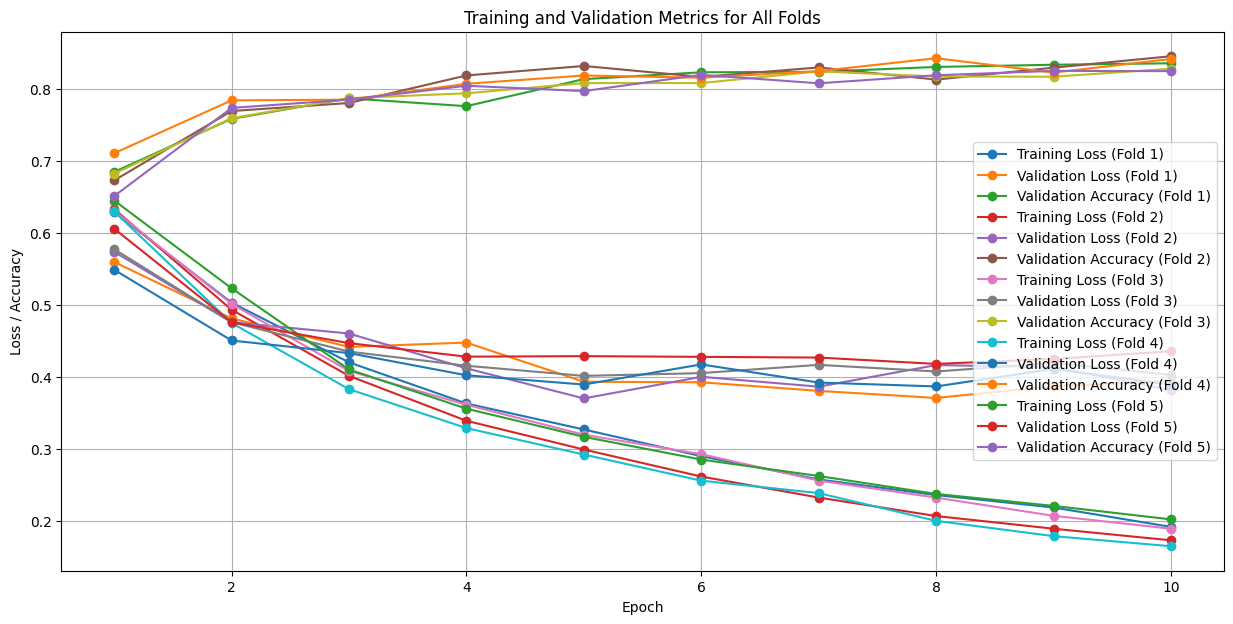

In [ ]:
import matplotlib.pyplot as plt

# Create a single figure for all folds
plt.figure(figsize=(15, 7))

# Plot the training and validation metrics for each fold
for fold in range(5):
    num_epochs_fold = len(train_losses[fold])  # Get the number of epochs for this fold
    plt.plot(range(1, num_epochs_fold + 1), train_losses[fold], label=f'Training Loss (Fold {fold + 1})', marker='o')
    plt.plot(range(1, num_epochs_fold + 1), validation_losses[fold], label=f'Validation Loss (Fold {fold + 1})', marker='o')
    plt.plot(range(1, num_epochs_fold + 1), validation_accuracies[fold], label=f'Validation Accuracy (Fold {fold + 1})', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.legend()
plt.title('Training and Validation Metrics for All Folds')
plt.grid(True)
plt.show()

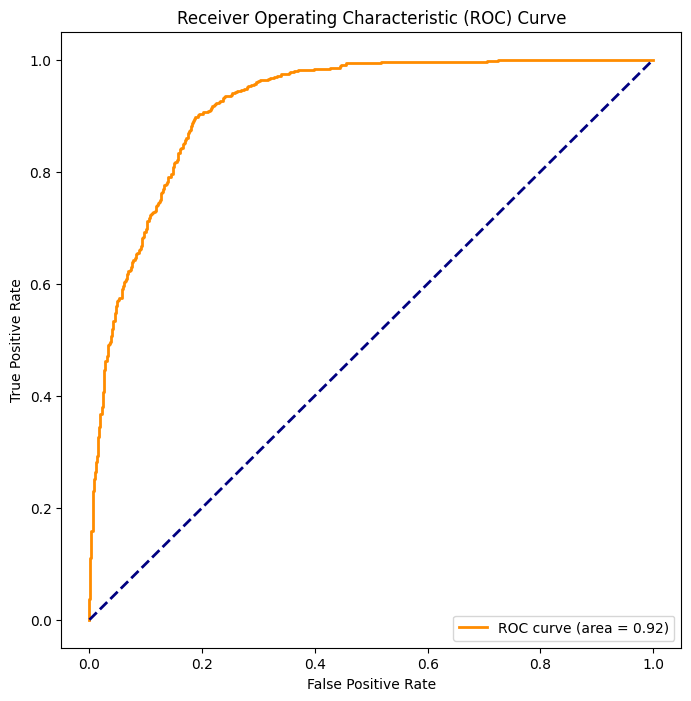

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Set the model to evaluation mode
model.eval()

all_labels = []
all_probs = []

with torch.no_grad():
    for batch in test_loader:
        tcr_inputs = batch['TCR_encoded'].float()
        hla_inputs = batch['HLA.aa_encoded'].float()
        antigen_inputs = batch['Antigen_encoded'].float()

        inputs = torch.cat((tcr_inputs, hla_inputs, antigen_inputs), dim=1)

        labels = batch['Affinity'].float().numpy()
        all_labels.extend(labels)

        outputs = model(inputs).squeeze().numpy()
        all_probs.extend(outputs)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
